# ECE 4554/ ECE 5554 / Computer Vision
This file contains the coding problems (Machine Problems 1 and 2) for Homework 1. 
Your job is to implement/modify the sections within this notebook that are marked with "TO DO".

##**TO DO**: Enter your Virginia Tech Username (PID) here: ankitparekh 

##**Honor Code reminder**

Once again, please review the Honor Code statement in the syllabus.  

##**Submission guidelines** for the coding problems (Google Colab)

1. Please verify that you have entered your Virginia Tech Username in all of the appropriate places.
2. After your solutions are complete, click Runtime->"Restart and run all"; then verify that all of your solutions are visible in this notebook.
3. Click File->Save near the top of the page to save the latest version of your notebook at Google Drive.
4. Verify that the last 2 cells have executed, creating a PDF version of this notebook at Google Drive. (If you face difficulty with this step, please refer to https://pypi.org/project/notebook-as-pdf/)
5. Look at the PDF file and confirm that all of your solutions are displayed correctly there.
6. Download your notebook file and the PDF version to your laptop.
7. On your laptop, create a ZIP version of this notebook file. (Please don't include any separate data files.) Use file name Homework1_Code_USERNAME.zip, with your own Username.
6. For your PDF version, use file name Homework1_Notebook_USERNAME.pdf, with your own Username.
7. **<span style="color:blue"> Submit these 2 files and your PDF file for Problems 1-4 SEPARATELY to Canvas.**</span> Do not zip them all together.





Machine Problem 5 (MP5):

In [1]:
# Mount your Google Drive to this notebook
# The purpose is to allow your code to access to your files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Change the directory to your own working directory
# You code will be able to read and write files in your working directory
# TO DO: Enter the name of your directory
import os
os.chdir('/content/drive/MyDrive/5554/HW1')

In [3]:
# Import library modules
import sys
import cv2 # OpenCV library
from PIL import Image # PIL is the Python Imaging Library
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import warnings

In [4]:
print('Python version:', sys.version)
print('OpenCV version:', cv2.__version__)
print('NumPy version: ', np.__version__)

Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
OpenCV version: 4.6.0
NumPy version:  1.21.6


# Machine Problem 1: Working with Python and NumPy (10 points) 

a) Write a brief description of the result of each of the following Python commands. Try to
guess the result before running the commands interactively. If needed, check the document "Familiarization with Colab" 
that is posted at Canvas.



In [5]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
b = a[:,1]
c = np.ravel(a)
d = np.random.poisson(4,10)
e = d[d>=7]
x = np.zeros((4,5))
y = 2 * np.ones_like(x)
z = x * y
f = np.arange(30,50,2)
g = f.reshape(2,5)
h = np.random.choice(f)

TO DO:  Write your descriptions here.

Since the above block uses poisson distribution and np.random functions the values of some of the variables might change in consecutive runs. I have documented the values which I got as output for one of the runs.

1. a is initialized to a 2D numpy array -> a = [[1,2,3], [4,5,6], [7,8,9], [10,11,12]]

2. b is initialized to the column at 1st index -> b = array([ 2,  5,  8, 11])

3. c is formed by flattening out 2D numpy array a -> c = array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

4. d is an array of values representing a poisson distribution with lambda = 4 and the size of the array being 10. -> d = array([6, 8, 5, 3, 5, 5, 7, 1, 4, 6])

5. e is an array of elements of d where the element value is greater than or equal to 7. -> e = array([8, 7])

6. x is a 2D numpy array of zeros with dimensions (row  * column) 4 * 5 -> x = [[0. 0. 0. 0. 0.], [0. 0. 0. 0. 0.], [0. 0. 0. 0. 0.], [0. 0. 0. 0. 0.]]

7. y is 2 multipled to an array of ones with dimensions of x -> y = [[2. 2. 2. 2. 2.], [2. 2. 2. 2. 2.], [2. 2. 2. 2. 2.], [2. 2. 2. 2. 2.]]

8. z is the multiplication of 2 matrices (2D numpy arrays) x * y -> z = [[0. 0. 0. 0. 0.], [0. 0. 0. 0. 0.], [0. 0. 0. 0. 0.], [0. 0. 0. 0. 0.]]

9. f is a list of numbers starting from 30 till 50 (not inclusive) with increments of 2 -> f = [30 32 34 36 38 40 42 44 46 48]

10. g is a reshaped version of f with dimensions 2 * 5 -> g = [[30 32 34 36 38], [40 42 44 46 48]]

11. h is any random element from g -> h = 46


In [6]:
# Verify your answers
print(f'a: {a}\n\n b: {b}\n\n c: {c}\n\n d: {d}\n\n e: {e}\n\n x: {x}\n\n y: {y}\n\n z: {z}\n\n f: {f}\n\n g: {g}\n\n h: {h}')

a: [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

 b: [ 2  5  8 11]

 c: [ 1  2  3  4  5  6  7  8  9 10 11 12]

 d: [1 3 3 5 6 3 6 5 1 3]

 e: []

 x: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

 y: [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]

 z: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

 f: [30 32 34 36 38 40 42 44 46 48]

 g: [[30 32 34 36 38]
 [40 42 44 46 48]]

 h: 34


b) Let y be the vector: y = np.array([1, 2, 3, 4, 5, 6]). Use the reshape command to form a new matrix z that looks like this: 

[[1 2 3]
 [4 5 6]]

In [7]:
y = np.array([1, 2, 3, 4, 5, 6])
###################################
# TO DO: write the code to create z
z = y.reshape(2, 3)

###################################
print(f'z: {z}')

z: [[1 2 3]
 [4 5 6]]


c) Use np.min and np.where to set x to the minimum value that occurs in z (from the previous part of this problem), and set r to the row location and c to the column location where that minimum value occurs. Remember that Python uses zero-indexing.



In [8]:
###################################
# TO DO: write the code to assign values to x,r and c
x = np.min(z)
(r, c) = np.where(a == x)

###################################
print(f'x: {x}\nr: {r}\nc: {c}')

x: 1
r: [0]
c: [0]


d) Let v be the vector: v = np.array([1, 8, 8, 2, 1, 3, 9, 8]).  Create a new list w,  assign to it all the numbers greater than 5 in v. (Try to do this last step using one line of Python code.)




In [9]:
v = np.array([1, 8, 8, 2, 1, 3, 9, 8])
###################################
# TO DO: write the code to create w
w = v[np.where(v > 5)]

###################################
print(w)

[8 8 9 8]


e) Use np.random.randint and create an array named u that contains the result of rolling a six-sided die over N trials. (You can pick a convenient value for N.)



In [10]:
###################################
# TO DO: write the code
u = np.random.randint(1,6,20)

###################################
print(f'dice: {u}')

dice: [4 1 3 3 4 4 4 5 1 2 2 2 2 3 1 5 3 2 4 1]


f) Write code to do the following things.
Create a 100 x 100 matrix named mat. Assign any convenient integer values to mat, without
all elements being identical. (In a later step you will look at the histogram of mat, and create new
matrices based on mat.)



shape of mat: (100, 100)


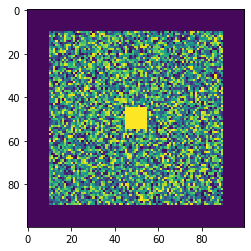

In [11]:
###################################
# TO DO: write the code
# The following is a temporary assignment to mat;
#  try it, just for illustration of imshow(), and then replace this line with your code

mat = np.random.randint(0,512 ,size = (100,100))

# Below operations to mat are done to give it some distinguishable attributes which allocates the pixels with some convenient values for better understanding. 

# Assigning the pixels in the centre square (with dimensions (10,10)) to max intensity = 512
mat[45:55,45:55] = np.ones((10,10)) * 512

# Assigning the borders (width = 10) to a low intensity = 10
#Left border
mat[:,0:10] = np.ones((100,10)) * 10
#Right border
mat[:,90:100] = np.ones((100,10)) * 10
#Top border
mat[0:10,:] = np.ones((10,100)) * 10
#Bottom border
mat[90:100,:] = np.ones((10,100)) * 10

###################################
# The next line should display your matrix mat as an image
# Notice that matplotlib.pyplot may color-code the values that are displayed
plt.imshow(mat, interpolation='none')
print(f'shape of mat: {mat.shape}')

g) Plot a histogram of mat’s intensities with 20 bins.

(array([3879.,  301.,  327.,  294.,  320.,  341.,  306.,  310.,  329.,
         315.,  309.,  337.,  336.,  315.,  314.,  304.,  352.,  296.,
         302.,  413.]),
 array([  0. ,  25.6,  51.2,  76.8, 102.4, 128. , 153.6, 179.2, 204.8,
        230.4, 256. , 281.6, 307.2, 332.8, 358.4, 384. , 409.6, 435.2,
        460.8, 486.4, 512. ]),
 <a list of 20 Patch objects>)

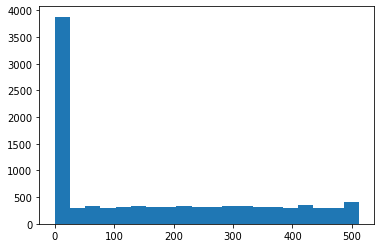

In [12]:
###################################
# TO DO: write the code
plt.hist(mat.ravel(), bins = 20)
###################################


h) Create a new matrix mat2 that consists of the lower left quadrant of mat.

In [13]:
###################################
# TO DO: write the code
mat2 = mat[50:,:50]
#print(mat2)

plt.imshow(mat2, interpolation='none')
print(f'shape of mat2: {mat2.shape}')
###################################

shape of mat2: (50, 50)


i) Create a new matrix mat3 that has the same size and values as mat2. Then subtract the mean value of mat2 from every element of mat3.  Display mat3 in a similar fashion to the previous cases involving mat and mat2.


In [14]:
###################################
# TO DO: write the code
#print(np.average(mat2))
mat3 = mat2 - np.average(mat2)
#print(mat3)
plt.imshow(mat3, interpolation='none')
print(f'shape of mat3: {mat3.shape}')
###################################

shape of mat3: (50, 50)


j) Create a new matrix mat4 that represents a color image that has the same size as mat3, but with 3 channels to represent Red, Green, and Blue values. Set the values in mat4 to be blue (i.e., R = 0, G = 0, B = 255) wherever the intensity in mat3 is greater than a threshold t = the average intensity in mat2, and black everywhere else.  Be careful with type-casting. Display mat4 just as was done for the previous examples.


shape of mat4: (50, 50, 3)


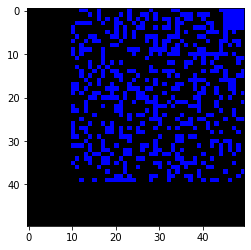

In [15]:
###################################
# TO DO: write the code
mat4 = np.zeros([np.shape(mat3)[0], np.shape(mat3)[1], 3], int)
indices = np.where(mat3 > np.average(mat2), 255, 0)
#print(indices)
#plt.imshow(indices, interpolation='none')
mat4[:,:,2]=indices
plt.imshow(mat4, interpolation='none')
print(f'shape of mat4: {mat4.shape}')
###################################

# Machine Problem 2: Generating new images (10 points)

For this problem, you will write Python/OpenCV code that will input an image, and then perform steps to create new images from the original.
First, verify that you can read an image, convert it to grayscale format, and display them. 

You must first
upload mandrill.tif to your working directory.
Incidentally, a mandrill is “a large fierce gregarious baboon of western Africa”.


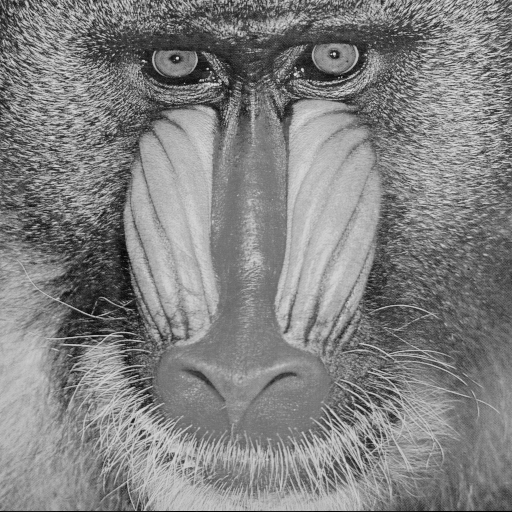

In [16]:
# This example uses cv2_imshow to display an image 
# (Note: we would use cv2.imshow if running on your laptop, 
#  but cv2.imshow is not allowed in Colab)
from google.colab.patches import cv2_imshow

img_color = cv2.imread("mandrill.tif", cv2.IMREAD_COLOR)
cv2_imshow(img_color)

print ('\n')
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale)

a) Write a Python function named **subsample1** that accepts a grayscale image as input and outputs a smaller (downsampled) version of the input. You may assume that
the input image is of size 512x512. The output should be of size 256x256. For this assignment it is acceptable to hard-code these sizes in your function.  Test your function using img_grayscale (from the previous code block) as the input.

Your function should create the smaller output image by discarding pixels from alternating rows and columns of the input image.
In other words, using math (not Python) notation, let (r, c) refer to a particular (row, column) of the output image; the output pixel value at location (r, c) should simply be the value from location (2\*r, 2\*c) in the input image.

It can be very helpful to use print/display statements during debugging. However, for the final code that you submit, your subsample1 function should not print or display anything. 


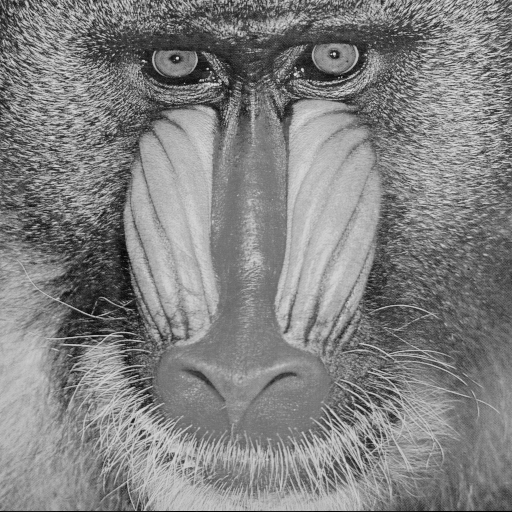

Output image for part (a):


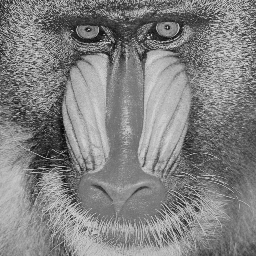

In [17]:
###################################
def subsample1(img_in):
  '''Create a new image that has half the resolution as the input image
     by discarding pixels

  Input: 
    img_in: a grayscale image of size 512 x 512

  Return value:
    img_out: a new image of size 256 x 256

  TO DO: implement the function.
  '''
  output_height = 256
  output_width = 256
  img_out = np.zeros((output_height, output_width))

  f = 2 # Down Sampling rate

  [input_height, input_width] = img_in.shape

  for i in range(0, input_height, f):
    for j in range(0, input_width, f):
        try:
 
            img_out[i//f][j//f] = img_in[i][j]
        except IndexError:
            pass
 
  # print(img_in)
  # print(img_out)
  # Show down sampled image
  #print('Down Sampled Image:')
  return img_out

###################################

# Display the original and subsampled images
# It should be apparent that the output is half the size 
#  (both vertically and horizonally) as the input image

cv2_imshow(img_grayscale)
print('Output image for part (a):')
img_small1 = subsample1(img_grayscale)
cv2_imshow(img_small1)



b) Write a Python function named **subsample2** that accepts a grayscale image as input and outputs a smaller (downsampled) version of the input. As before, you may assume that
the input image is of size 512x512, and the output should be of size 256x256. *Unlike subsample1*, each output pixel should now be computed as the average of 4 pixels from the input image. 

Using math (not Python) notation,  let (r, c) refer to a particular (row, column) of the output image. The output pixel value at location (r, c) should be computed as the average of the four pixels at locations (2\*r, 2\*c), (2\*r+1, 2\*c), (2\*r, 2\*c+1), and (2\*r+1, 2\*c+1) within the input image.

Test your function using img_grayscale as the input. Because of the averaging, you should be able to see some subtle differences in the output of your two subsampling functions.

Your final subsample2 function should not print or display anything.



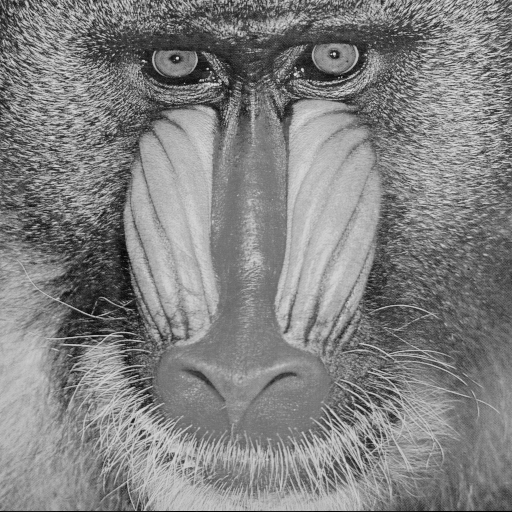

Output image for part (b):


In [18]:
###################################
def subsample2(img_in):
  '''Create a new image that has half the resolution as the input image.
     Each pixel value in the new image is computed as the average of 4
     pixels from the input image.

  Input: 
    img_in: a grayscale image of size 512 x 512

  Return value:
    img_out: a new image of size 256 x 256

  TO DO: implement the function.
  '''
  output_height = 256
  output_width = 256
  img_out = np.zeros((output_height, output_width))

  f = 2 # Downsampling rate (--> 512/256)

  [input_height, input_width] = img_in.shape
  
  for i in range(0, input_height, f):
    for j in range(0, input_width, f):
        try:
            img_out[i//f][j//f] = sum([img_in[i][j], img_in[i+1][j], img_in[i][j+1], img_in[i+1][j+1]])/4
        except IndexError:
            pass

  # print(img_in)

  # print(img_out.shape)

  return img_out

###################################

# Display the original and subsampled images
# It should be apparent that the output is half the size 
#  (both vertically and horizonally) as the input image

cv2_imshow(img_grayscale)
print('Output image for part (b):')
img_small2 = subsample2(img_grayscale)
cv2_imshow(img_small2)

c) Write a Python function named **rotate90** that accepts a grayscale image as input and outputs a new image that has been rotated 90 degrees counterclockwise. Here you may assume that the input and output images are both of size 512x512. Your final rotate90 function should not print or display anything.

Test your function using img_grayscale as the input. 



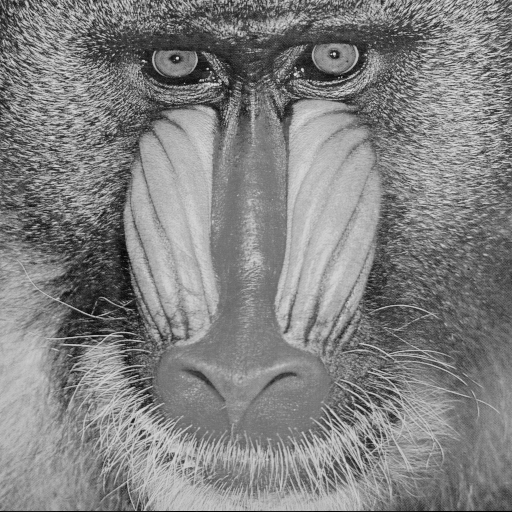

Output image for part (c):


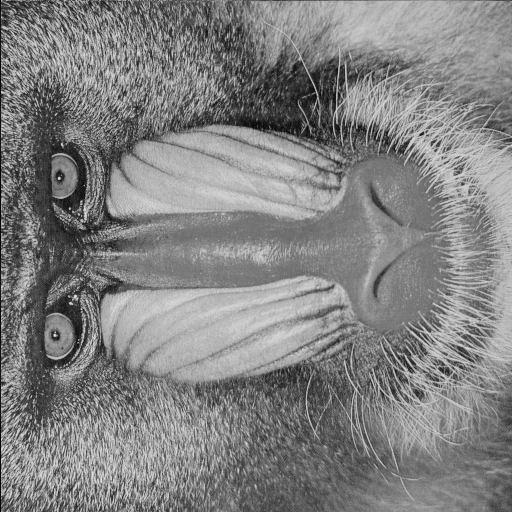

In [19]:
###################################
def rotate90(img_in):
  '''Create a new image that has is a rotated version of the input image.
     The output should be rotated 90 degrees counterclockwise. 

  Input: 
    img_in: a grayscale image of size 512 x 512

  Return value:
    a new image of size 512 x 512

  TO DO: implement the function.
  '''
  # output_height = 512
  # output_width = 512
  # img_out = np.zeros((output_height, output_width))

  #img_out = cv2.rotate(img_in, cv2.ROTATE_90_COUNTERCLOCKWISE)
  height, width = img_in.shape

  img_out = np.zeros([height, width], dtype=np.uint8)

  for i in range(height):
    for j in range(width):
        img_out[i,j] = img_in[j-1,i-1]
        img_out = img_out[0:height,0:width]
     
  return img_out

###################################

# Display the original and rotated images
# It should be apparent that the both images are of the same size

cv2_imshow(img_grayscale)
print('Output image for part (c):')
img_rotated = rotate90(img_grayscale)
cv2_imshow(img_rotated)

d) Write a Python function named **cropeye** that accepts the original grayscale mandrill image as input and outputs a new, small image that contains one eye of the mandrill. The size of the output image should be 64x64.

Your code does *not* need to detect the eyes of the mandrill. You may choose either the left or the right eye, and use trial and error to find the appropriate (row, column) location. Place the pupil of the eye near the center of your output image.

Your final cropeye function should not print or display anything.





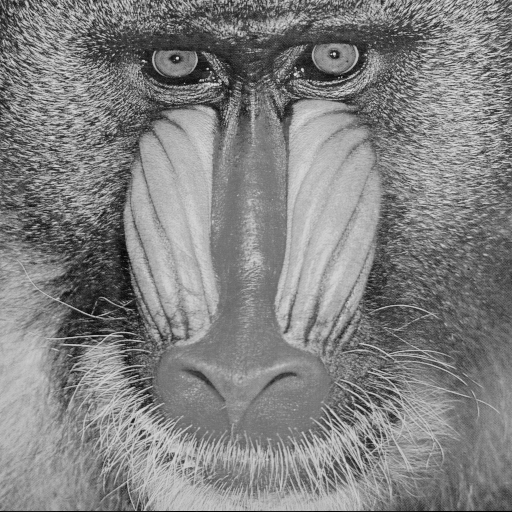

Output image for part (d):


In [20]:
###################################
def cropeye(img_in):
  '''Create a new image that contains the eye of the Mandrill 

  Input: 
    img_in: a grayscale Mandrill image of size 512 x 512

  Return value:
    a new image of size 64 x 64

  TO DO: implement the function.
  '''
  output_height = 64
  output_width = 64
  x, y = 35, 138
  img_out = img_in[x:x+output_height, y:y+output_width]
  return img_out

###################################

# Display the original and rotated images
# It should be apparent that the both images are of the same size

cv2_imshow(img_grayscale)
print('Output image for part (d):')
img_cropped = cropeye(img_grayscale)
cv2_imshow(img_cropped)

Creating a PDF version of your current notebook:

In [21]:
#The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc 
!pip install --quiet pypandoc

In [22]:
# TO DO: Provide the full path to your Jupyter notebook file
!jupyter nbconvert --to PDF "/content/drive/MyDrive/5554/HW1/Homework1_ankitparekh.ipynb"
#!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/Homework1_USERNAME.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/5554/HW1/Homework1_ankitparekh.ipynb to PDF
[NbConvertApp] Support files will be in Homework1_ankitparekh_files/
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making directory ./Homework1_ankitparekh_files
[NbConvertApp] Making d